In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

C:\Users\13196\AppData\Local\Temp\ipykernel_19984\2240459599.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# survey df
survey = pd.read_csv("survey.csv")
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Cleaning the Survey Dataset

In [3]:
# dropping unused columns
dropped_cols = ["Timestamp", "work_interfere", "no_employees", "leave", "benefits", "care_options",
                "wellness_program", "anonymity", "mental_health_consequence", "phys_health_consequence",
                "mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence", 
                "comments", "family_history"]
survey.drop(columns=dropped_cols, inplace=True)

In [4]:
# dropping all null values
survey = survey.dropna().reset_index(drop=True)

In [5]:
survey.head()

,Age,Gender,Country,state,self_employed,treatment,remote_work,tech_company,seek_help,coworkers,supervisor
0,46,male,United States,MD,Yes,No,Yes,Yes,Don't know,Yes,Yes
1,29,Male,United States,NY,No,Yes,No,Yes,No,Some of them,Some of them
2,31,male,United States,NC,Yes,No,Yes,Yes,No,Some of them,Some of them
3,46,Male,United States,MA,No,Yes,Yes,Yes,No,Some of them,Yes
4,41,Male,United States,IA,No,Yes,No,No,Don't know,No,No


In [6]:
# only usa entries
df1 = survey[survey["Country"] == "United States"]
df1 = df1.reset_index(drop=True)

# only those who are employed by company
df2  = df1[df1["self_employed"] == "No"]
df2 = df2.reset_index(drop=True)

# work in a primarily tech company
df3 = df2[df2["tech_company"] == "Yes"]
df3 = df3.reset_index(drop=True)

In [7]:
df3.head()

,Age,Gender,Country,state,self_employed,treatment,remote_work,tech_company,seek_help,coworkers,supervisor
0,29,Male,United States,NY,No,Yes,No,Yes,No,Some of them,Some of them
1,46,Male,United States,MA,No,Yes,Yes,Yes,No,Some of them,Yes
2,33,male,United States,CA,No,Yes,No,Yes,Yes,Yes,Yes
3,33,male,United States,TN,No,No,No,Yes,Don't know,Some of them,No
4,35,Female,United States,CA,No,Yes,Yes,Yes,Don't know,Yes,Yes


In [8]:
# checking gender values
gender = df3["Gender"]
gender.unique()

array(['Male', 'male', 'Female', 'female', 'M', 'Male-ish', 'maile',
       'Trans-female', 'F', 'Cis Male', 'm', 'Male (CIS)', 'f',
       'queer/she/they', 'non-binary', 'Femake', 'Make', 'Genderqueer',
       'Female ', 'Male ', 'Man', 'msle', 'Female (trans)',
       'Female (cis)', 'Mail', 'cis male', 'Woman'], dtype=object)

In [9]:
# replacing female identifying entries with "Female"
f_replace = ["Female", "female", "Trans-female", "F", "f", "Femake", "Female ",
             "Female (trans)", "Female (cis)", "Woman"]
df3["Gender"] = df3["Gender"].replace(f_replace, "Female")

# replacing male identifying entries with "Male"
m_replace = ["Male", "male", "M", "maile", "Cis Male", "m", "Male (CIS)",
             "Make", "Male ", "Man", "msle", "Mail", "cis male"]
df3["Gender"] = df3["Gender"].replace(m_replace, "Male")

# replacing non-conforming identifying entries with "Non-comforming"
nc_replace = ["Male-ish", "queer/she/they", "non-binary", "Genderqueer"]
df3["Gender"] = df3["Gender"].replace(nc_replace, "Non-Comforming")

In [10]:
# checking values have been correctly replaced
df3["Gender"].unique()

array(['Male', 'Female', 'Non-Comforming'], dtype=object)

In [11]:
# checking values have been correctly replaced
df3

,Age,Gender,Country,state,self_employed,treatment,remote_work,tech_company,seek_help,coworkers,supervisor
0,29,Male,United States,NY,No,Yes,No,Yes,No,Some of them,Some of them
1,46,Male,United States,MA,No,Yes,Yes,Yes,No,Some of them,Yes
2,33,Male,United States,CA,No,Yes,No,Yes,Yes,Yes,Yes
3,33,Male,United States,TN,No,No,No,Yes,Don't know,Some of them,No
4,35,Female,United States,CA,No,Yes,Yes,Yes,Don't know,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
540,30,Male,United States,CA,No,Yes,No,Yes,No,Yes,Yes
541,29,Male,United States,NC,No,Yes,Yes,Yes,No,Some of them,No
542,32,Male,United States,IL,No,Yes,Yes,Yes,No,Some of them,Yes
543,34,Male,United States,CA,No,Yes,No,Yes,No,No,No


In [12]:
# checking age col
df3["Age"].unique()

array([ 29,  46,  33,  35,  34,  42,  40,  27,  50,  30,  38,  22,  32,
        24,  36,  23,  25,  31,  44,  28,  45,  18,  39,  26,  43,  37,
        41,  60,  54, 329,  21,  55,  57,  58,  48,  47,  62,  56,  49,
         5,  20,  51,  53,  19], dtype=int64)

In [13]:
# dropping entry
survey_clean = df3[(df3["Age"] != 329) & (df3["Age"] != 5)].reset_index(drop=True)
survey_clean

,Age,Gender,Country,state,self_employed,treatment,remote_work,tech_company,seek_help,coworkers,supervisor
0,29,Male,United States,NY,No,Yes,No,Yes,No,Some of them,Some of them
1,46,Male,United States,MA,No,Yes,Yes,Yes,No,Some of them,Yes
2,33,Male,United States,CA,No,Yes,No,Yes,Yes,Yes,Yes
3,33,Male,United States,TN,No,No,No,Yes,Don't know,Some of them,No
4,35,Female,United States,CA,No,Yes,Yes,Yes,Don't know,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
538,30,Male,United States,CA,No,Yes,No,Yes,No,Yes,Yes
539,29,Male,United States,NC,No,Yes,Yes,Yes,No,Some of them,No
540,32,Male,United States,IL,No,Yes,Yes,Yes,No,Some of them,Yes
541,34,Male,United States,CA,No,Yes,No,Yes,No,No,No


In [14]:
# stat descriptions of age
age_stats = survey_clean["Age"].describe()
print(age_stats)

count    543.000000
mean      32.819521
std        7.530297
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       62.000000
Name: Age, dtype: float64


In [15]:
feats = ["Age", "Gender", "state", "remote_work", "seek_help", "coworkers", "supervisor"]

### Creating Visualizations

#### MatPlotLib Figure: A distribution of Remote_work, Gender, Coworkers, Seek_help, Supervisor, and Age and their counts of each category

C:\Users\13196\AppData\Local\Temp\ipykernel_19984\380930502.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,
C:\Users\13196\AppData\Local\Temp\ipykernel_19984\380930502.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,
C:\Users\13196\AppData\Local\Temp\ipykernel_19984\380930502.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,
C:\Users\13196\AppData\Local\Temp\ipykernel_19984\380930502.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

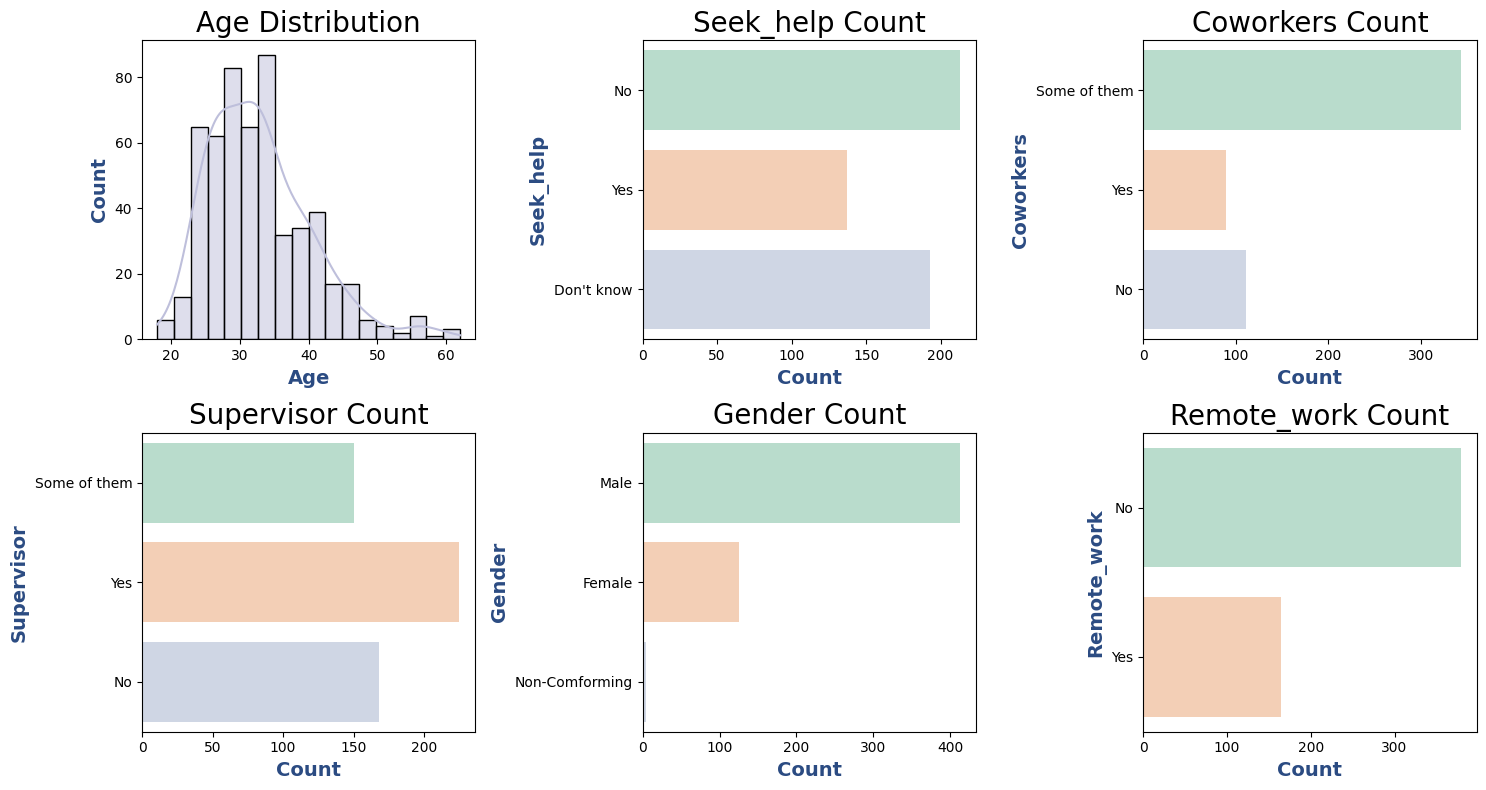

In [16]:
# mpl figure
plt.figure(figsize=(15, 8))

# hist for age
plt.subplot(2, 3, 1)
sns.histplot(survey_clean["Age"], 
             kde=True,
             color="#BEBFDB", 
             edgecolor="#000000")
plt.title("Age Distribution", 
          fontdict={"fontsize": 20, 
                    "fontweight": "medium", 
                    "color": "#000000"})
plt.xlabel("Age", 
           fontdict={"fontsize": 14, 
                            "fontweight": "bold", 
                            "color": "#2B4B82"})
plt.ylabel("Count", 
           fontdict={"fontsize": 14, 
                     "fontweight": "bold", 
                     "color": "#2B4B82"})

# categotical cols
categorical = ["seek_help", 
               "coworkers", 
               "supervisor", 
               "Gender", 
               "remote_work"]
for i, col in enumerate(categorical, start=2):
    plt.subplot(2, 3, i)
    sns.countplot(y=col, 
                  data=survey_clean, 
                  palette="Pastel2")
    # customizing title
    plt.title(f"{col.capitalize()} Count", 
              fontdict={"fontsize": 20, 
                        "fontweight": "medium", 
                        "color": "#000000"})
    # xlabel
    plt.xlabel("Count", 
               fontdict={"fontsize": 14, 
                         "fontweight": "bold",
                         "color": "#2B4B82"})
    # ylabel
    plt.ylabel(col.capitalize(),
               fontdict={"fontsize": 14, 
                         "fontweight": "bold", 
                         "color": "#2B4B82"})

plt.tight_layout()
plt.show()

#### Seaborn Figure: A distribution of the number of participants in the survey by state

C:\Users\13196\AppData\Local\Temp\ipykernel_19984\381155306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=survey_clean,


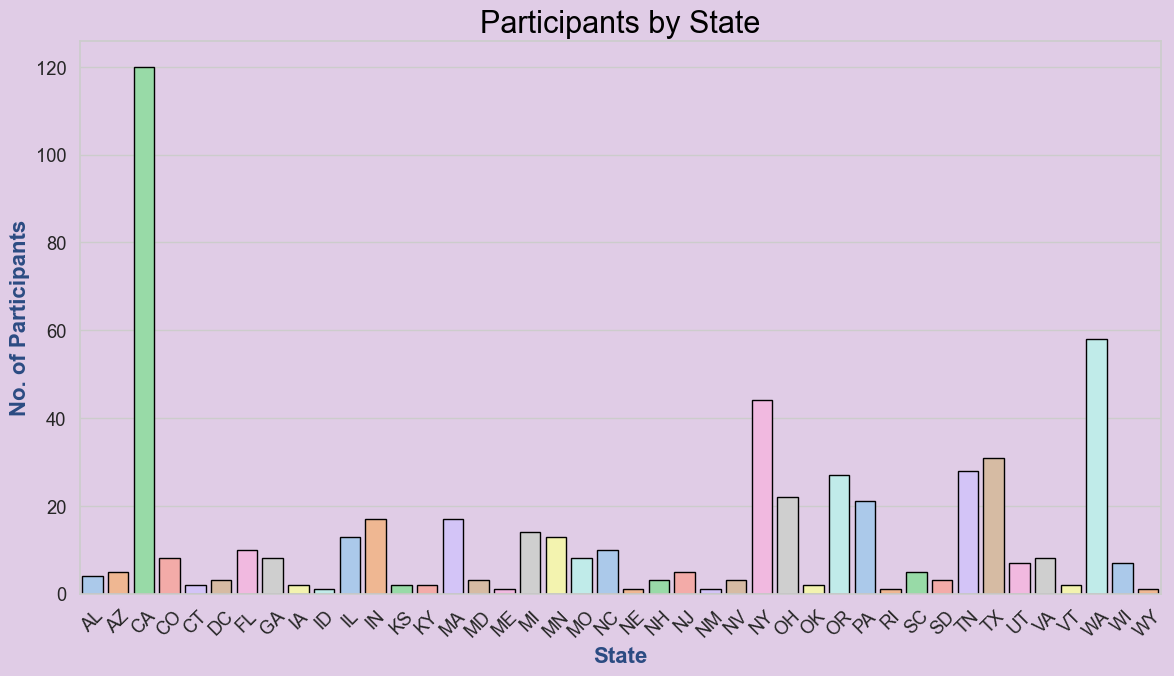

In [17]:
# sorting the states
states_sorted = survey_clean["state"].value_counts().sort_index()

# creating plot
sns.set(style="whitegrid", 
        font_scale=1.2)

figure, ax = plt.subplots(figsize=(12, 7), facecolor="#E0CCE6")
figure.set_facecolor("#E0CCE6")
ax.set_facecolor("#E0CCE6")

# Plotting with states sorted alphabetically
sns.countplot(data=survey_clean,
              x="state", 
              order=states_sorted.index,
              palette="pastel",
              edgecolor="#000000")
# title
plt.title("Participants by State",
          fontdict={"fontsize": 22, 
                    "fontweight": "medium", 
                    "color": "#000000"})
# xlabel
plt.xlabel("State",
          fontdict={"fontsize": 16, 
                    "fontweight": "bold", 
                    "color": "#2B4B82"})
# ylabel
plt.ylabel("No. of Participants",
           fontdict={"fontsize": 16, 
                    "fontweight": "bold", 
                    "color": "#2B4B82"})
# rotating
plt.xticks(rotation=45)
# making plot fit better
plt.tight_layout()
plt.show()

#### MatPlotLib Figure: Distributions of the interested variables vs. the target variable (treatment) and thier counts in each category

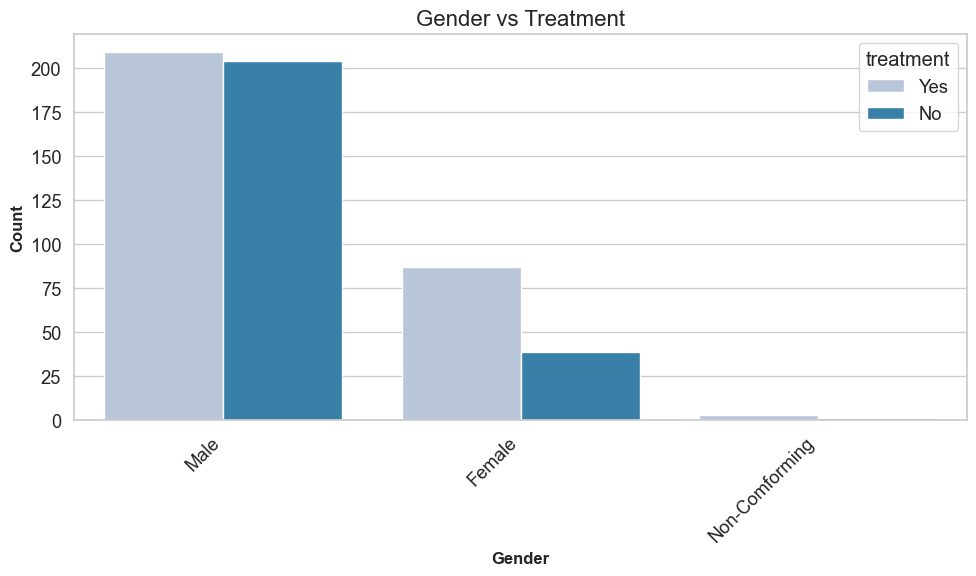

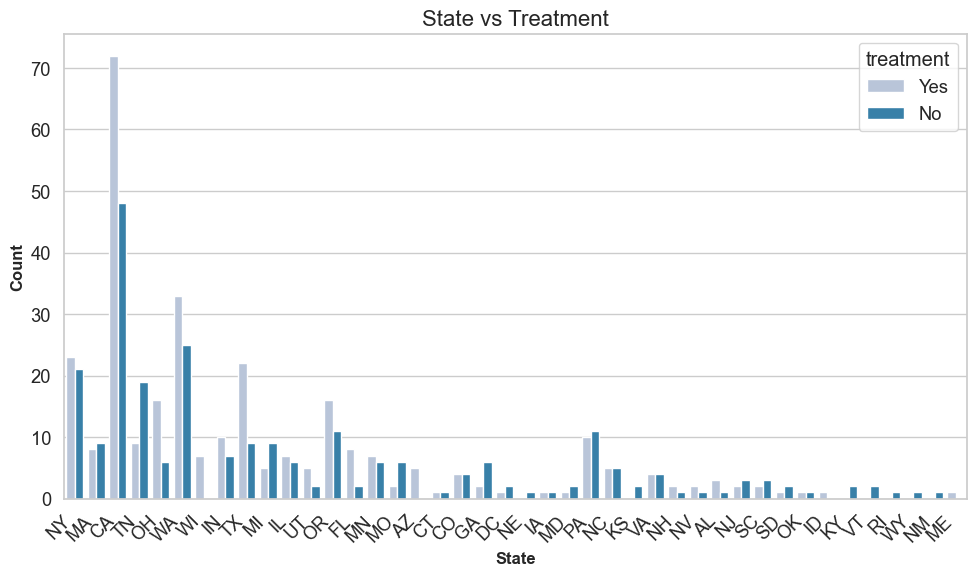

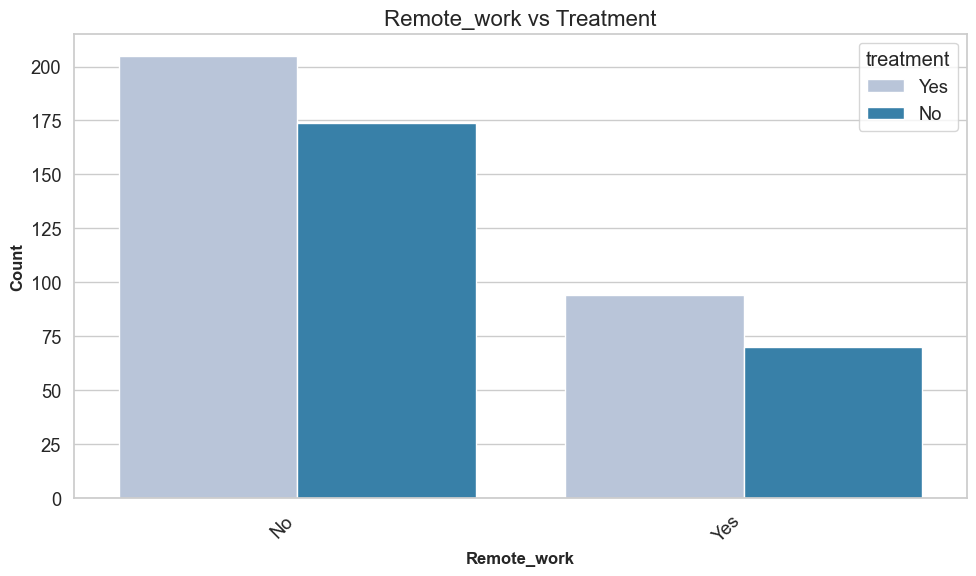

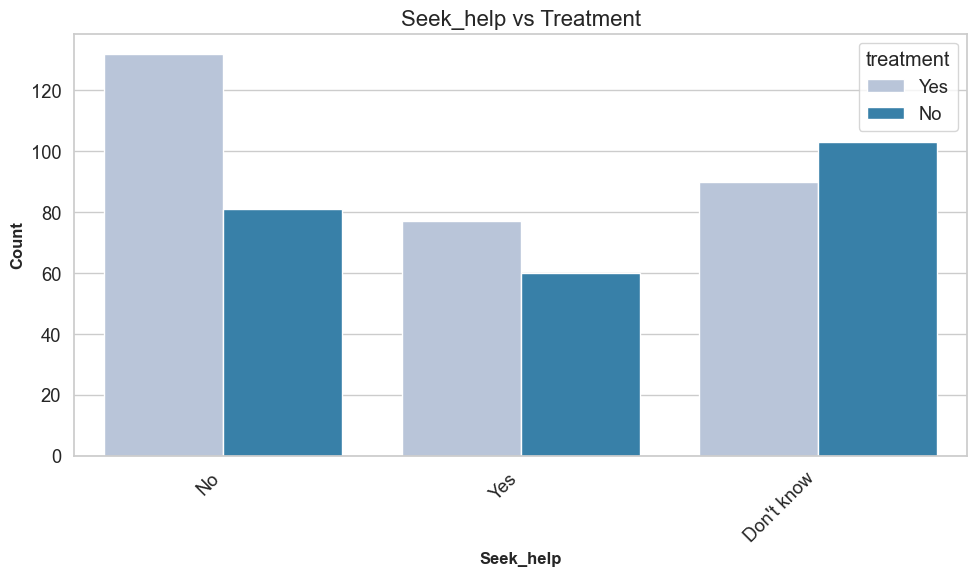

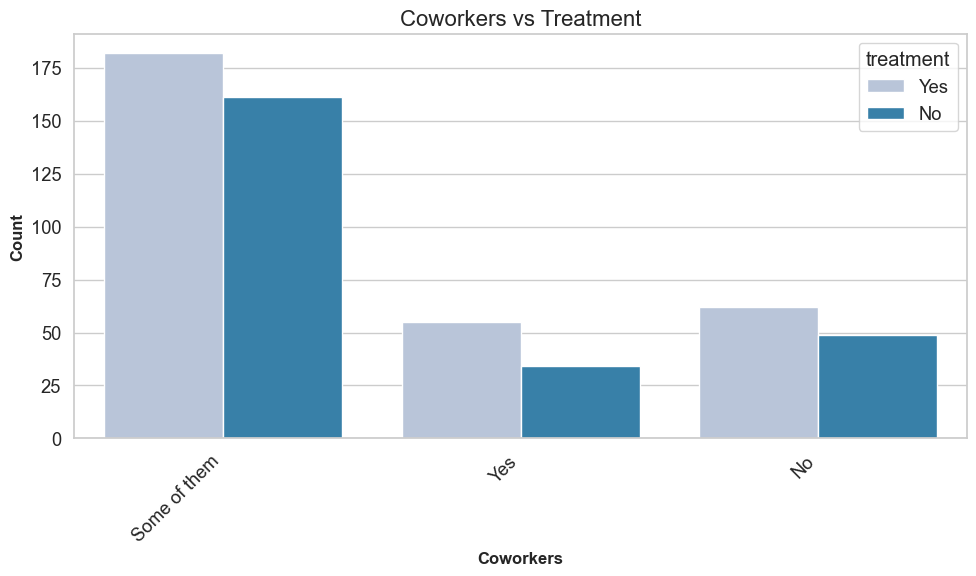

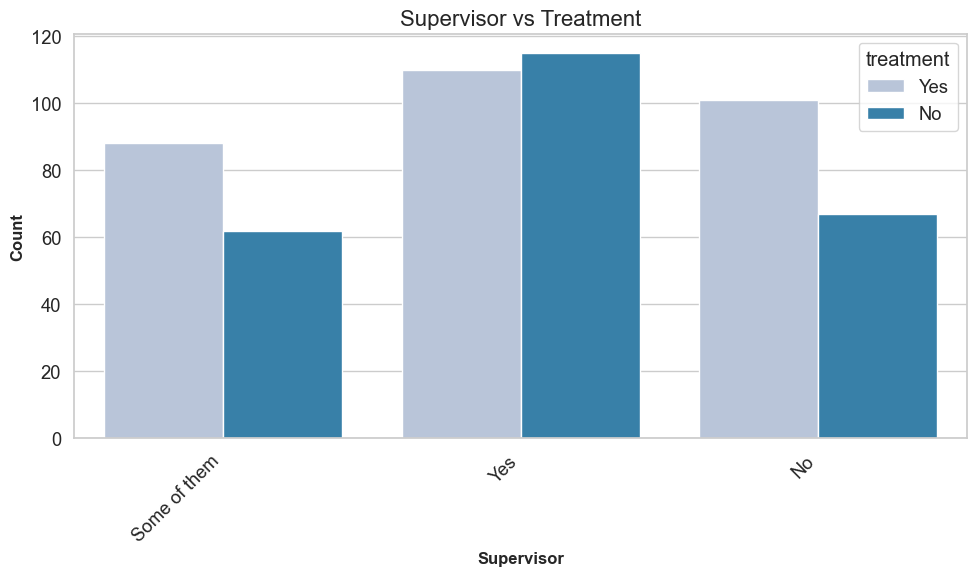

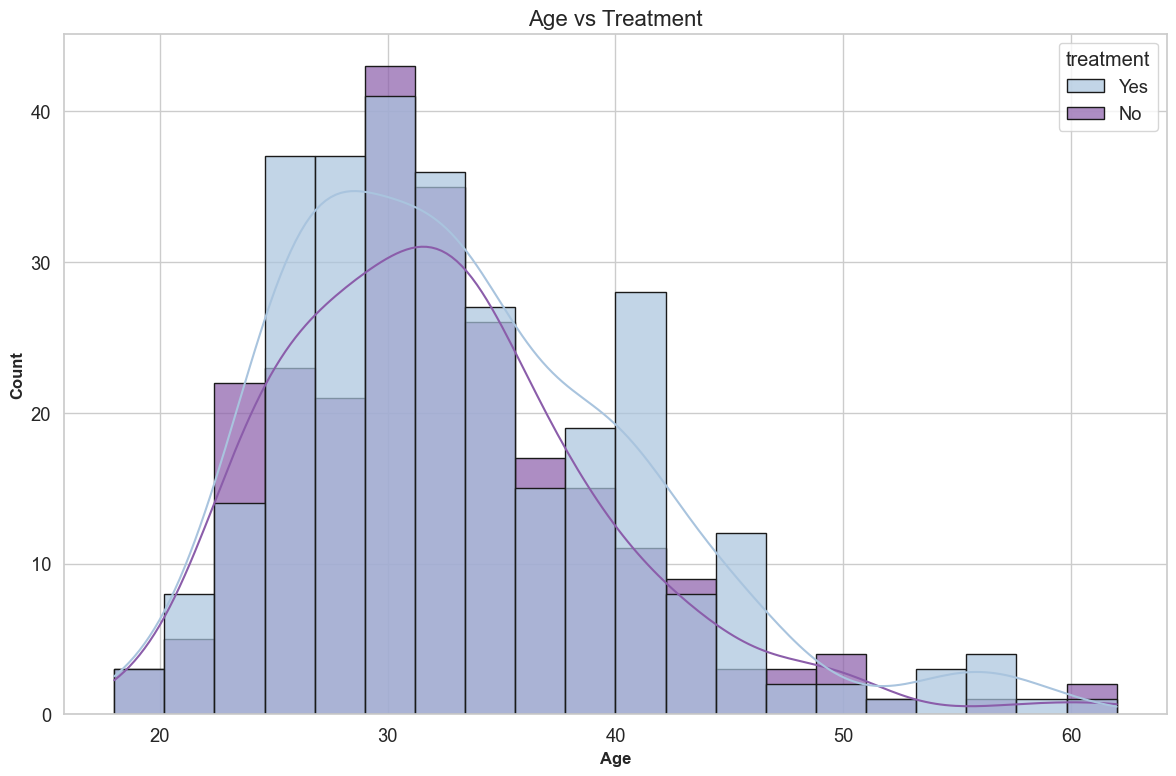

In [18]:
# cols needed
cols = ["Gender",
        "state", 
        "remote_work",
        "seek_help", 
        "coworkers",
        "supervisor", 
        "Age"]

for c in cols:
    # for numerical data - age
    if c == "Age":
        plt.figure(figsize=(12, 8))
        sns.histplot(data=survey_clean,
                     x="Age",
                     hue="treatment",
                     palette="BuPu",
                     bins=20,
                     kde=True,
                     edgecolor="k",
                     alpha=0.7)
        # title
        plt.title("Age vs Treatment",
                  fontsize=16,
                  fontweight="medium")
        # ticks & label - x
        plt.xlabel(c.capitalize(),
                   fontsize=12,
                   fontweight="bold")
        # label - y
        plt.ylabel("Count",
                   fontsize=12,
                   fontweight="bold")
    else:
        # all other categorical data
        plt.figure(figsize=(10, 6))
        sns.countplot(data=survey_clean,
                      x=c,
                      hue="treatment",
                      palette="PuBu")
        # title
        plt.title(f"{c.capitalize()} vs Treatment",
                  fontsize=16,
                  fontweight="medium")
        # ticks & label - x
        plt.xticks(rotation=45, ha="right")
        plt.xlabel(c.capitalize(),
                   fontsize=12,
                   fontweight="bold")
        # label - y
        plt.ylabel("Count",
                   fontsize=12,
                   fontweight="bold")
    plt.tight_layout()
    plt.show()

### Statistical Analysis

In [19]:
# chi-square test associations
for f in feats:
    c_table = pd.crosstab(survey_clean["treatment"],
                          survey[f])
    chi2, p, dof, expected = chi2_contingency(c_table)
    print(f, p)

Age 0.7507636627417628
Gender 0.42748166424918427
state 0.5354330159459723
remote_work 0.20096909380023095
seek_help 0.06755522048205834
coworkers 0.8695792988695413
supervisor 0.9360178583613568


In [20]:
# cramers v
def cramers_v(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

for f in feats:
    c_table = pd.crosstab(survey_clean["treatment"], survey_clean[f])
    chi2, p, dof, expected = chi2_contingency(c_table)
    n = sum(c_table.sum())
    k = min(c_table.shape)
    v = cramers_v(chi2, n, k)
    print(f, v)

Age 0.2680569385455755
Gender 0.16009974765405546
state 0.3134497674184556
remote_work 0.02575741455632213
seek_help 0.13382926861897212
coworkers 0.06387021482101794
supervisor 0.10502367233509147


In [21]:
# mean of treatment by age
treatment_by_age = survey_clean.groupby("treatment")["Age"].mean()
print(treatment_by_age)

treatment
No     32.368852
Yes    33.187291
Name: Age, dtype: float64


In [22]:
# counts and percent of treatment by gender
treatment_by_gender = survey_clean.groupby(["Gender", "treatment"]).size().unstack(fill_value=0)
treatment_by_gender["percent_yes"] = (treatment_by_gender["Yes"] / treatment_by_gender.sum(axis=1)) * 100
treatment_by_gender["percent_no"] = (treatment_by_gender["No"] / treatment_by_gender.sum(axis=1)) * 100
print(treatment_by_gender)

treatment        No  Yes  percent_yes  percent_no
Gender                                           
Female           39   87    69.047619   19.995117
Male            204  209    50.605327   44.002946
Non-Comforming    1    3    75.000000    1.265823


#### Pie Chart of the distrubution of gender in the dataset to show uneven counts

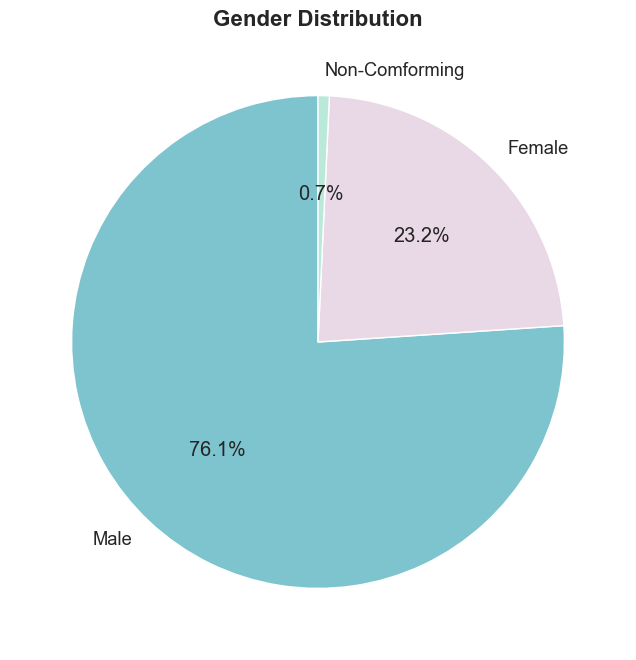

In [23]:
# gender counts
counts = survey_clean["Gender"].value_counts()
# plot
plt.figure(figsize=(10, 8))
# the plot
counts.plot.pie(
    autopct="%1.1f%%", 
    startangle=90, 
    colors=["#7EC4CF", "#E9D9E6", "#BAE8D9"]
)
# title
plt.title("Gender Distribution",
          fontsize=16, 
          fontweight="bold")
# removing y label
plt.ylabel("")
plt.show()

#### Seaborn Figure: Box-Plot distribution of age across gender

C:\Users\13196\AppData\Local\Temp\ipykernel_19984\695031494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender",


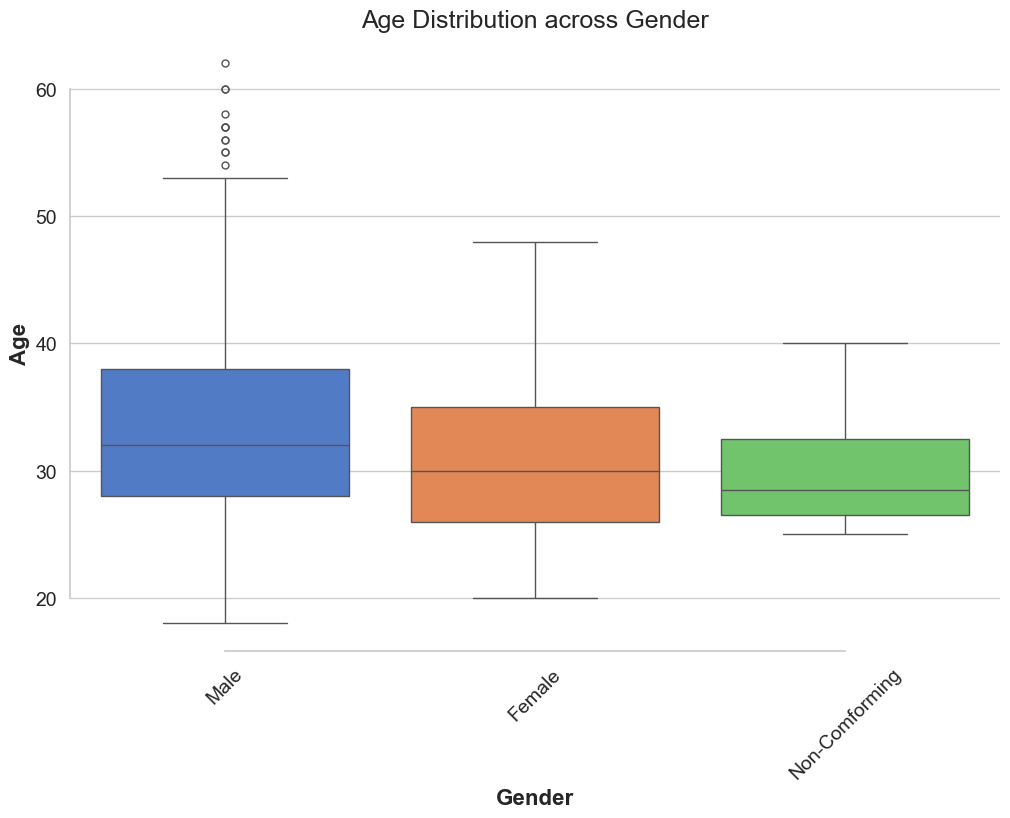

In [24]:
# boxplot for age across gender
plt.figure(figsize=(12, 8))
sns.boxplot(x="Gender", 
            y="Age", 
            data=survey_clean,
            palette="muted",
            fliersize=5,
            linewidth=1,
            saturation=.85)

# title
plt.title("Age Distribution across Gender", 
          fontsize=18)
# xlabel
plt.xlabel("Gender", 
           fontsize=16, 
           fontweight="bold")
# ylabel
plt.ylabel("Age",
           fontsize=16, 
           fontweight="bold")

# tickmarks - x
plt.xticks(rotation=45, fontsize=14)

# tickmarks - y
plt.yticks(fontsize=14)

# rid the line spine
sns.despine(trim=True)

plt.show()

### Machine Learning: K Nearest Neigbors

In [25]:
# importing packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
# cols needed
feats = ["Gender", "state", "remote_work", "seek_help", "coworkers", "supervisor"]

# mapping
y = survey_clean["treatment"].map({"Yes": 1, "No": 0})

# one hot encoding
one_hot = OneHotEncoder()  

# fit & transform
encoded = one_hot.fit_transform(survey_clean[feats]).toarray()

# encoded into df
en_survey = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(feats))

# reset index
survey_clean.reset_index(drop=True, inplace=True)

# need to add age since it is already numeric
X = pd.concat([survey_clean[["Age"]], en_survey], axis=1)

In [28]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# prediction
y_pred = knn.predict(X_test)

In [32]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5504587155963303


In [33]:
# confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(confusion_mat)

Confusion Matrix: 
[[21 23]
 [26 39]]


In [34]:
# classification report
report = classification_report(y_test, 
                                     y_pred, 
                                     target_names=["No", "Yes"])
print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

          No       0.45      0.48      0.46        44
         Yes       0.63      0.60      0.61        65

    accuracy                           0.55       109
   macro avg       0.54      0.54      0.54       109
weighted avg       0.56      0.55      0.55       109

